<a href="https://colab.research.google.com/github/toasted-breads-2/KratosLDInductions/blob/main/Comp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
torch.Size([100, 3, 32, 32]) torch.Size([100])
epoch 1 / 15, step 100/500, loss = 1.9472
epoch 1 / 15, step 200/500, loss = 1.8704
epoch 1 / 15, step 300/500, loss = 1.8714
epoch 1 / 15, step 400/500, loss = 1.8358
epoch 1 / 15, step 500/500, loss = 1.8252
epoch 2 / 15, step 100/500, loss = 1.9225
epoch 2 / 15, step 200/500, loss = 1.6658
epoch 2 / 15, step 300/500, loss = 1.7064
epoch 2 / 15, step 400/500, loss = 1.7049
epoch 2 / 15, step 500/500, loss = 1.7791
epoch 3 / 15, step 100/500, loss = 1.8813
epoch 3 / 15, step 200/500, loss = 1.6599
epoch 3 / 15, step 300/500, loss = 1.6742
epoch 3 / 15, step 400/500, loss = 1.5623
epoch 3 / 15, step 500/500, loss = 1.6505
epoch 4 / 15, step 100/500, loss = 1.5703
epoch 4 / 15, step 200/500, loss = 1.5789
epoch 4 / 15, step 300/500, loss = 1.7585
epoch 4 / 15, step 400/500, loss = 1.5145
epoch 4 / 15, step 500/500, loss = 1.6380
epoch 5 / 15, step 100/500, loss = 1.

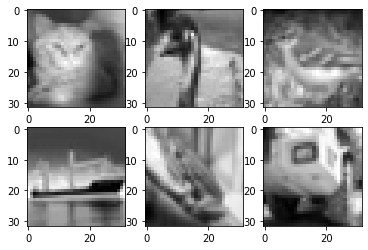

In [ ]:
#Training NN
#importing 

import torch 
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
import torch.utils.data as DataLoader 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


#device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#setting up hyper parameters
input_size = 3072 #32x32x3 as the shape [100,3,32,32]
hidden_size = 100
num_classes = 10 
num_epochs = 15
batch_size =100
learning_rate = 0.001



#Getting dataset from CIFAR10
#Training and testing datasets
train_dataset = datasets.CIFAR10( root = './data', train = True, transform = transforms.ToTensor(), download= True)
test_dataset = datasets.CIFAR10( root = './data', train = False , transform = transforms.ToTensor(), download= True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)


#looking at one batch of the dataset to get size
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape, labels.shape)
# output gives torch.Size([100, 3, 32, 32]) torch.Size([100])


#looking at the plots
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')


#creating classes with init and forward method, architecture 
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()  # activation function applied
    self.l2 = nn.Linear(hidden_size, num_classes)
   

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out 

model = NeuralNet(input_size, hidden_size, num_classes)


# loss and optimizer that applies softmax for us
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


#starting the training loop 

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
   for i, (images, labels) in enumerate(train_loader):
     #reshape the images here
     images = images.reshape(-1, 32*32*3).to(device)
     labels = labels.to(device)

#forward pass

     outputs = model(images)
     loss = criterion(outputs, labels)

#backward pass
     optimizer.zero_grad()
     loss.backward() # backpropagation here 
     optimizer.step()

#printing the loss at every 101th step
     if (i + 1) % 100 == 0:
       print(f'epoch {epoch +1} / {num_epochs}, step {i + 1}/{n_total_steps}, loss = {loss.item():.4f}')
  
#end of training loop 



#for testing and evaluation 



with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape( -1, 32*32*3).to(device) 
    labels = labels.to(device)
    outputs = model(images) #it should be a trained model now 

    _, predictions = torch.max(outputs, 1) # max function returns value and index
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

#accuracy printing

  acc = 100*n_correct / n_samples
  print(f'accuracy = {acc}')  

















